<a href="https://colab.research.google.com/github/DanieleFoscarin/NNDL_hw3/blob/main/state_from_image_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(400, 600, 3)


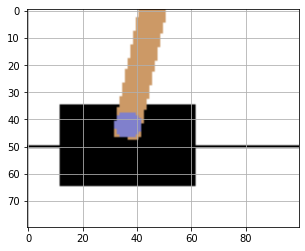

In [ ]:
frame = np.load("/content/drive/MyDrive/UNI_ICT/NNDL/NNDL_hw3_data/fame.npy")
plt.imshow(frame[250:330,480:580])
plt.grid()
print(np.shape(frame))

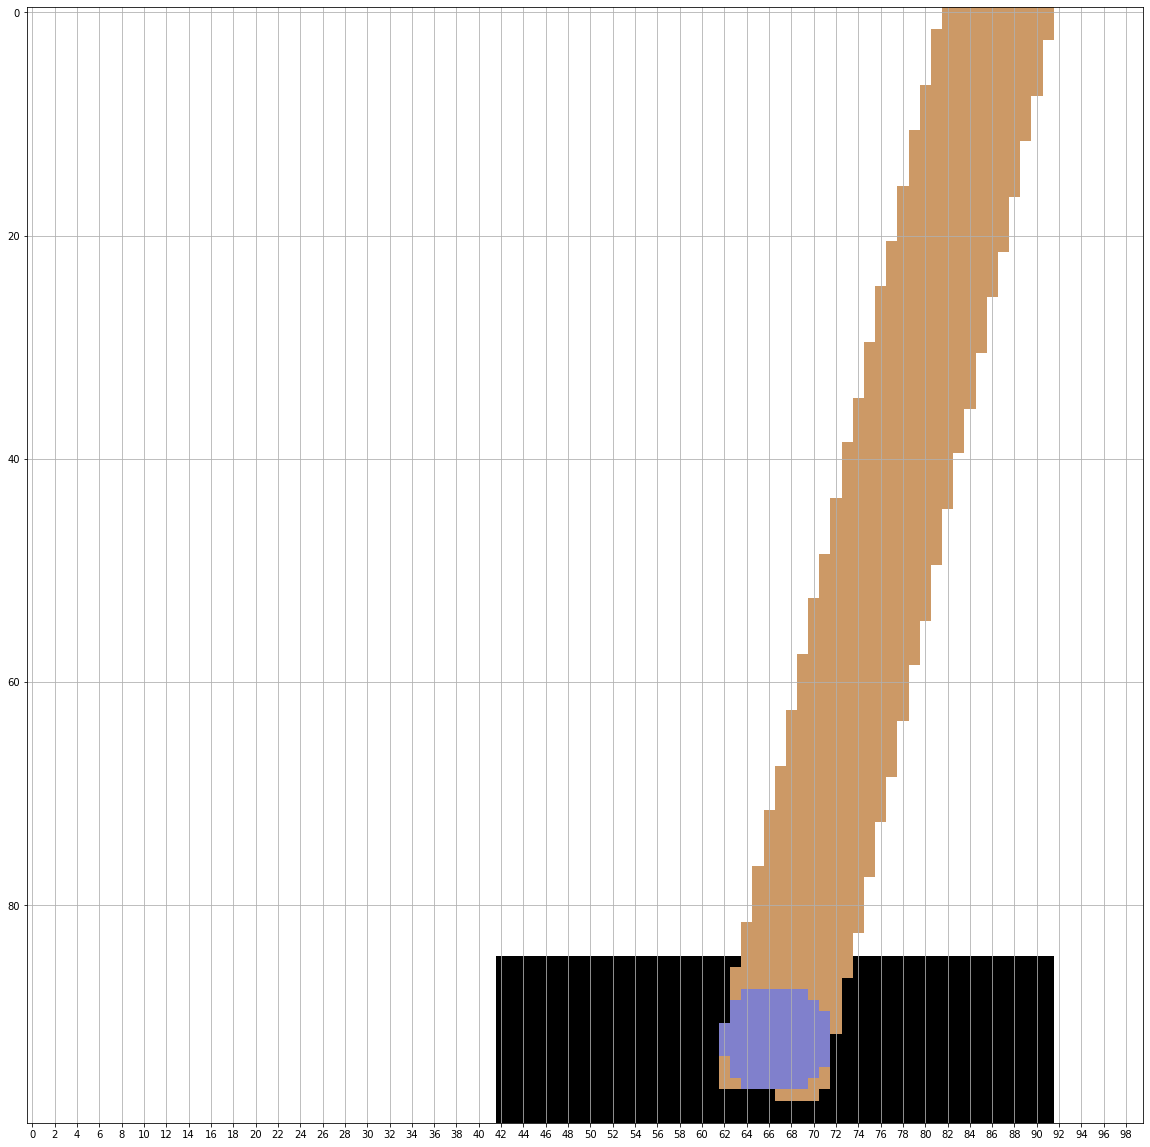

In [8]:
# frame_2 = frame.copy()
# frame_2[:,2:,:] = frame[:,:-2,:]
# frame_2[:,0:2,:] = frame[:,-3:-1,:]
frame = np.load("/content/drive/MyDrive/UNI_ICT/NNDL/NNDL_hw3_data/fame.npy")
fig, ax = plt.subplots(1,1,figsize=(20,25))
ax.imshow(frame[200:300, 450:550])
ax.set_xticks(range(0,100,2))
plt.grid()

In [ ]:
print()

516.5
24.5
(140, 84)


ValueError: ignored

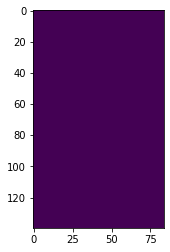

In [ ]:
# we consider frame1 the old and frame2 the current
# frame1 = frame.copy

frame1 = frame[160:300]
# frame2 = frame_2[160:300]
cart_pos1 = np.mean(np.arange(600)[frame1[139,:,0]<255])
# print(frame1[139,:,0]<255)
print(cart_pos1)
cart_pos1 = 24.5 + np.argmin(frame1[139,:,0]<255)
print(cart_pos1)
# cart_pos2 = np.mean(np.arange(600)[frame2[139,:,0]<255])

# cart_vel = cart_pos2 - cart_pos1

# resctrict the searched area in the neighborhood of the cart
flat_search1 = frame1[:,int(np.clip(cart_pos1-60, 0 ,np.shape(frame1)[1])):int(np.clip(cart_pos1+60, 0 ,np.shape(frame1)[1])),0]
# flat_search2 = frame2[:,int(np.clip(cart_pos1-60, 0 ,np.shape(frame2)[1])):int(np.clip(cart_pos1+60, 0 ,np.shape(frame2)[1])),0]
plt.imshow(flat_search1)
print(np.shape(flat_search1))

#reshape varying the last dimension first
flat_search1 = np.reshape(flat_search1, (120*140,1))
# flat_search2 = np.reshape(flat_search2, (120*140,1))

idx1 = np.argmax(flat_search1<255)
point1 = [idx1//120, idx1%120] 
point1 = (point1[0], point1[1]-60)
print(point1)
pole_pos1 = (point1[0], cart_pos1 + point1[1])
pole_rel_pos1 = point1[1]

print(pole_rel_pos1)

# idx2 = np.argmax(flat_search1<255)
# point2 = [idx2//120, idx2%120]
# point2 = (point2[0], point2[1]-60)
# pole_pos2 = (point2[0], cart_pos2 + point2[1])
# pole_rel_pos2 = point2[1]

# pole_vel = pol_rel_pos2 - pole_rel_pos1

In [26]:
frame = np.load("/content/drive/MyDrive/UNI_ICT/NNDL/NNDL_hw3_data/fame.npy")


frame = frame[200:300]

cart_pos = 24.5 + np.argmin(frame[99,:,0])

pole_pos = np.where(frame[0,:]<255)[0][0] + 3.5

print("deb pos",pole_pos)
pole_rel_pos = pole_pos - cart_pos


print(point)
print(cart_pos,pole_rel_pos)

deb pos 535.5
(14, 21)
516.5 19.0


In [ ]:
frame = np.load("/content/drive/MyDrive/UNI_ICT/NNDL/NNDL_hw3_data/fame.npy")
import time
@numba.njit
def img_process1(frame):
    frame = frame[160:300]
    # cart_pos = np.mean(np.arange(600)[frame[139,:,0]<255])
    cart_pos = 24.5 + np.argmin(frame1[139,:,0])
    # print(cart_pos)
    ros_L = int(max(cart_pos-60, 0))
    ros_R = int(min(cart_pos+60, np.shape(frame)[1]))
    flat_search = frame[:,ros_L:ros_R, 0]
    return flat_search, ros_L, ros_R
@numba.njit
def img_process2(flat_search):
    idx = np.argmax(flat_search<255)
    point = [idx//120, idx%120] 
    point = (point[0], point[1]-60)

    pole_pos = (point[0], cart_pos + point[1])
    pole_rel_pos = point[1]
    return pole_rel_pos

def state(frame):
    for i in range(100):
        flat_search, ros_L, ros_R = img_process1(frame)
        flat_search = np.reshape(flat_search, ((ros_R-ros_L)*140,1))
        pole_ros_pos = img_process2(flat_search)
    return cart_pos,pole_rel_pos


print(cart_pos,pole_rel_pos)
# %timeit state(frame)
# %timeit state(frame)
start = time.time()
_,_ = state(frame)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))
start = time.time()
_,_ = state(frame)
end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

516.5 21
Elapsed (with compilation) = 0.6215956211090088
Elapsed (after compilation) = 0.013164043426513672


need 


*   cart position
*   cart velocity
*   pole angle
*   pole angular velocity 


In [ ]:

def state_from_image(frame2, frame1):
    #consider frame1 as old and frame2 as current
    
    frame1 = frame[160:300]
    frame2 = frame_2[160:300]
    cart_pos1 = np.mean(np.arange(600)[frame1[139,:,0]<255])
    cart_pos2 = np.mean(np.arange(600)[frame2[139,:,0]<255])

    cart_vel = cart_pos2 - cart_pos1


    # resctrict the searched area in the neighborhood of the cart
    ros_L1 = int(max(cart_pos1-60, 0))
    ros_R1 = int(min(cart_pos1+60, np.shape(frame1)[1]))

    ros_L2 = int(max(cart_pos2-60, 0))
    ros_R2 = int(min(cart_pos2+60, np.shape(frame2)[1]))

    flat_search1 = frame1[:,ros_L1:ros_R1, 0]
    flat_search2 = frame2[:,ros_L2:ros_R2, 0]

    #reshape varying the last dimension first
    flat_search1 = np.reshape(flat_search1, (120*140,1))
    flat_search2 = np.reshape(flat_search2, (120*140,1))

    idx1 = np.argmax(flat_search1<255)
    point1 = [idx1//120, idx1%120] 
    point1 = (point1[0], point1[1]-60)
    pole_pos1 = (point1[0], cart_pos1 + point1[1])
    pole_rel_pos1 = point1[1]

    idx2 = np.argmax(flat_search1<255)
    point2 = [idx2//120, idx2%120]
    point2 = (point2[0], point2[1]-60)
    pole_pos2 = (point2[0], cart_pos2 + point2[1])
    pole_rel_pos2 = point2[1]

    pole_vel = pole_rel_pos2 - pole_rel_pos1

    return cart_pos2, cart_vel, pole_rel_pos2, pole_vel


state = state_from_image(frame, frame2)
print(state)

(518.5, 2.0, 21, 0)
